# Fake Voice Identification

In [1]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from scipy import signal
import numpy as np
import librosa
import librosa.display
import wave
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical
import seaborn as sns

## 1. Preprocessing

In [2]:
Folder_orig="Real-Time-Voice-Cloning-master/data_wav/Orignal"
Folder_fake="Real-Time-Voice-Cloning-master/data_wav/Fake"

In [3]:
X=[]
Y=[]

pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))
#
for flist in os.listdir(Folder_orig):
    wav, sr = librosa.load(os.path.join(Folder_orig , flist))
    mfcc = librosa.feature.mfcc(wav)
    padded_mfcc = pad2d(mfcc,40)
    
    X.append(padded_mfcc)
    Y.append(0)

#
for flist in os.listdir(Folder_fake):
    wav, sr = librosa.load(os.path.join(Folder_fake , flist))
    mfcc = librosa.feature.mfcc(wav)
    padded_mfcc = pad2d(mfcc,40)
    
    X.append(padded_mfcc)
    Y.append(1)


C:\Users\patel\AppData\Local\Temp\ipykernel_8052\2981385946.py:8: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.8553767e-06 2.2607655e-05
 7.2404007e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
C:\Users\patel\AppData\Local\Temp\ipykernel_8052\2981385946.py:8: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
C:\Users\patel\AppData\Local\Temp\ipykernel_8052\2981385946.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.3668297e-08
 -2.9206250e-08  2.4582576e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
C:\Users\patel\AppData\Local\Temp\ipykernel_8052\2981385946.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.000000

C:\Users\patel\AppData\Local\Temp\ipykernel_8052\2981385946.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.0265295e-12
 -2.8869971e-12  1.7214348e-12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
C:\Users\patel\AppData\Local\Temp\ipykernel_8052\2981385946.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.5177572e-07
 -3.5396377e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
C:\Users\patel\AppData\Local\Temp\ipykernel_8052\2981385946.py:8: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9102754e-04
  1.8033350e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav)
C:\Users\patel\AppData\Local\Temp\ipykernel_8052\

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train=np.array(X_train)
y_train=to_categorical(np.array(y_train))
X_test=np.array(X_test)
y_test=to_categorical(np.array(y_test))

X_train_ex = np.expand_dims(X_train, -1)
X_test_ex = np.expand_dims(X_test, -1)

## 2. Deep neural network

In [5]:
ip = tf.keras.layers.Input(shape=X_train_ex[0].shape)

m = tf.keras.layers.Conv2D(256, kernel_size=(4, 4), activation='relu')(ip)
m = tf.keras.layers.MaxPooling2D(pool_size=(4, 4))(m)
m= tf.keras.layers.BatchNormalization()(m)
m = tf.keras.layers.Dropout(0.2)(m)
m = tf.keras.layers.Flatten()(m)
m = tf.keras.layers.Dense(64, activation='relu')(m)
m = tf.keras.layers.Dense(32, activation='relu')(m)
op = tf.keras.layers.Dense(2, activation='softmax')(m)
model = tf.keras.Model(inputs=ip, outputs=op)
checkpoint_path = "cp.ckpt"
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, mode='max', monitor='val_accuracy', verbose=1)

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train_ex,
          y_train,
          epochs=100,
          batch_size=32,
          validation_data=(X_test_ex, y_test),
          callbacks=[cp_callback])

Epoch 1/100
3/5 [=================>............] - ETA: 0s - loss: 0.4207 - accuracy: 0.7604
Epoch 1: val_accuracy improved from -inf to 0.74648, saving model to cp.ckpt


INFO:tensorflow:Assets written to: cp.ckpt\assets


INFO:tensorflow:Assets written to: cp.ckpt\assets


5/5 [==============================] - 2s 445ms/step - loss: 0.3619 - accuracy: 0.8333 - val_loss: 5.6667 - val_accuracy: 0.7465
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.1755 - accuracy: 0.9792  
Epoch 2: val_accuracy improved from 0.74648 to 0.87324, saving model to cp.ckpt


INFO:tensorflow:Assets written to: cp.ckpt\assets


INFO:tensorflow:Assets written to: cp.ckpt\assets


5/5 [==============================] - 1s 352ms/step - loss: 0.1755 - accuracy: 0.9792 - val_loss: 1.9805 - val_accuracy: 0.8732
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.7372 - accuracy: 0.8542
Epoch 3: val_accuracy did not improve from 0.87324
5/5 [==============================] - 0s 44ms/step - loss: 0.7372 - accuracy: 0.8542 - val_loss: 6.1406 - val_accuracy: 0.6901
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 1.0467 - accuracy: 0.9028
Epoch 4: val_accuracy did not improve from 0.87324
5/5 [==============================] - 0s 44ms/step - loss: 1.0467 - accuracy: 0.9028 - val_loss: 3.2539 - val_accuracy: 0.8310
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9931
Epoch 5: val_accuracy improved from 0.87324 to 0.88732, saving model to cp.ckpt


INFO:tensorflow:Assets written to: cp.ckpt\assets


INFO:tensorflow:Assets written to: cp.ckpt\assets


5/5 [==============================] - 1s 349ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 1.8854 - val_accuracy: 0.8873
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9722  
Epoch 6: val_accuracy did not improve from 0.88732
5/5 [==============================] - 0s 45ms/step - loss: 0.1020 - accuracy: 0.9722 - val_loss: 2.1050 - val_accuracy: 0.8873
Epoch 7/100
5/5 [==============================] - ETA: 0s - loss: 3.0921e-04 - accuracy: 1.0000
Epoch 7: val_accuracy did not improve from 0.88732
5/5 [==============================] - 0s 44ms/step - loss: 3.0921e-04 - accuracy: 1.0000 - val_loss: 2.7181 - val_accuracy: 0.8732
Epoch 8/100
5/5 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9861  
Epoch 8: val_accuracy did not improve from 0.88732
5/5 [==============================] - 0s 45ms/step - loss: 0.0269 - accuracy: 0.9861 - val_loss: 2.4886 - val_accuracy: 0.8732
Epoch 9/100
5/5 [==========================

INFO:tensorflow:Assets written to: cp.ckpt\assets


INFO:tensorflow:Assets written to: cp.ckpt\assets


5/5 [==============================] - 1s 346ms/step - loss: 9.7355e-06 - accuracy: 1.0000 - val_loss: 1.1789 - val_accuracy: 0.9014
Epoch 15/100
5/5 [==============================] - ETA: 0s - loss: 1.4833e-04 - accuracy: 1.0000
Epoch 15: val_accuracy did not improve from 0.90141
5/5 [==============================] - 0s 43ms/step - loss: 1.4833e-04 - accuracy: 1.0000 - val_loss: 1.0489 - val_accuracy: 0.9014
Epoch 16/100
5/5 [==============================] - ETA: 0s - loss: 3.1279e-05 - accuracy: 1.0000
Epoch 16: val_accuracy did not improve from 0.90141
5/5 [==============================] - 0s 42ms/step - loss: 3.1279e-05 - accuracy: 1.0000 - val_loss: 0.9383 - val_accuracy: 0.9014
Epoch 17/100
5/5 [==============================] - ETA: 0s - loss: 2.4213e-06 - accuracy: 1.0000
Epoch 17: val_accuracy did not improve from 0.90141
5/5 [==============================] - 0s 42ms/step - loss: 2.4213e-06 - accuracy: 1.0000 - val_loss: 0.8396 - val_accuracy: 0.9014
Epoch 18/100
3/5 [===

INFO:tensorflow:Assets written to: cp.ckpt\assets


INFO:tensorflow:Assets written to: cp.ckpt\assets


5/5 [==============================] - 1s 305ms/step - loss: 2.7720e-06 - accuracy: 1.0000 - val_loss: 0.6688 - val_accuracy: 0.9155
Epoch 20/100
5/5 [==============================] - ETA: 0s - loss: 8.8246e-06 - accuracy: 1.0000
Epoch 20: val_accuracy did not improve from 0.91549
5/5 [==============================] - 0s 44ms/step - loss: 8.8246e-06 - accuracy: 1.0000 - val_loss: 0.6067 - val_accuracy: 0.9155
Epoch 21/100
3/5 [=================>............] - ETA: 0s - loss: 3.7149e-06 - accuracy: 1.0000
Epoch 21: val_accuracy did not improve from 0.91549
5/5 [==============================] - 0s 40ms/step - loss: 2.8061e-06 - accuracy: 1.0000 - val_loss: 0.5572 - val_accuracy: 0.9155
Epoch 22/100
5/5 [==============================] - ETA: 0s - loss: 4.0918e-05 - accuracy: 1.0000
Epoch 22: val_accuracy did not improve from 0.91549
5/5 [==============================] - 0s 40ms/step - loss: 4.0918e-05 - accuracy: 1.0000 - val_loss: 0.5148 - val_accuracy: 0.9155
Epoch 23/100
3/5 [===

INFO:tensorflow:Assets written to: cp.ckpt\assets


INFO:tensorflow:Assets written to: cp.ckpt\assets


5/5 [==============================] - 1s 312ms/step - loss: 2.8202e-06 - accuracy: 1.0000 - val_loss: 0.4443 - val_accuracy: 0.9437
Epoch 25/100
3/5 [=================>............] - ETA: 0s - loss: 2.6994e-06 - accuracy: 1.0000
Epoch 25: val_accuracy improved from 0.94366 to 0.95775, saving model to cp.ckpt


INFO:tensorflow:Assets written to: cp.ckpt\assets


INFO:tensorflow:Assets written to: cp.ckpt\assets


5/5 [==============================] - 1s 299ms/step - loss: 1.7996e-06 - accuracy: 1.0000 - val_loss: 0.4155 - val_accuracy: 0.9577
Epoch 26/100
5/5 [==============================] - ETA: 0s - loss: 7.5227e-06 - accuracy: 1.0000
Epoch 26: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 46ms/step - loss: 7.5227e-06 - accuracy: 1.0000 - val_loss: 0.3907 - val_accuracy: 0.9577
Epoch 27/100
5/5 [==============================] - ETA: 0s - loss: 1.5337e-05 - accuracy: 1.0000
Epoch 27: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 45ms/step - loss: 1.5337e-05 - accuracy: 1.0000 - val_loss: 0.3698 - val_accuracy: 0.9577
Epoch 28/100
5/5 [==============================] - ETA: 0s - loss: 3.7112e-06 - accuracy: 1.0000
Epoch 28: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 44ms/step - loss: 3.7112e-06 - accuracy: 1.0000 - val_loss: 0.3520 - val_accuracy: 0.9577
Epoch 29/100
5/5 [===

Epoch 55/100
5/5 [==============================] - ETA: 0s - loss: 3.3546e-06 - accuracy: 1.0000
Epoch 55: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 44ms/step - loss: 3.3546e-06 - accuracy: 1.0000 - val_loss: 0.1515 - val_accuracy: 0.9437
Epoch 56/100
5/5 [==============================] - ETA: 0s - loss: 1.2020e-06 - accuracy: 1.0000
Epoch 56: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 42ms/step - loss: 1.2020e-06 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.9437
Epoch 57/100
5/5 [==============================] - ETA: 0s - loss: 4.2752e-06 - accuracy: 1.0000
Epoch 57: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 45ms/step - loss: 4.2752e-06 - accuracy: 1.0000 - val_loss: 0.1515 - val_accuracy: 0.9437
Epoch 58/100
5/5 [==============================] - ETA: 0s - loss: 2.8042e-06 - accuracy: 1.0000
Epoch 58: val_accuracy did not improve from 0.95775
5/5 

3/5 [=================>............] - ETA: 0s - loss: 2.8085e-06 - accuracy: 1.0000
Epoch 84: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 42ms/step - loss: 2.2059e-06 - accuracy: 1.0000 - val_loss: 0.1592 - val_accuracy: 0.9577
Epoch 85/100
3/5 [=================>............] - ETA: 0s - loss: 7.0174e-06 - accuracy: 1.0000
Epoch 85: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 39ms/step - loss: 5.2677e-06 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9577
Epoch 86/100
5/5 [==============================] - ETA: 0s - loss: 2.6023e-06 - accuracy: 1.0000
Epoch 86: val_accuracy did not improve from 0.95775
5/5 [==============================] - 0s 41ms/step - loss: 2.6023e-06 - accuracy: 1.0000 - val_loss: 0.1596 - val_accuracy: 0.9577
Epoch 87/100
5/5 [==============================] - ETA: 0s - loss: 1.0314e-06 - accuracy: 1.0000
Epoch 87: val_accuracy did not improve from 0.95775
5/5 [============

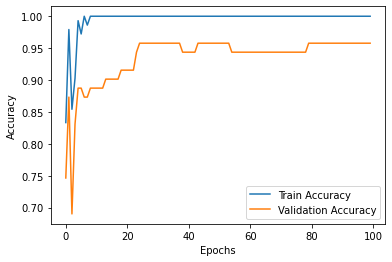

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

3/3 [==============================] - 0s 7ms/step


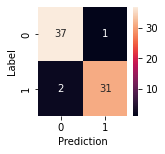

In [8]:
y_pred= model.predict(X_test_ex)
y_p= np.argmax(y_pred, axis=1)
y_pred=y_pred.astype(int)
y_t=np.argmax(y_test, axis=1)
confusion_mtx = tf.math.confusion_matrix(y_t, y_p) 
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mtx, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [9]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_t, y_p, average='micro')

(0.9577464788732394, 0.9577464788732394, 0.9577464788732394, None)